# Stable Diffusion XL

In [1]:
# !pip install -r requirements.txt

In [1]:
import os
from dotenv import load_dotenv

# Load the .env file
load_dotenv()

# Get the value of the key
nvapi_key = os.getenv('nvdiff')

In [2]:
import requests
import base64
from IPython.display import Image, display


def gen_image_diffusion(input):
    

    invoke_url = "https://ai.api.nvidia.com/v1/genai/stabilityai/stable-diffusion-xl"

    headers = {
        "Authorization": "Bearer " + nvapi_key,
        "Accept": "application/json",
    }

    payload = {
    "height": 1024,
    "width": 1024,
    "text_prompts": [
        {
        "text": input,
        "weight": 1
        },
        {
        "text": "",
        "weight": -1
        }
    ],
    "cfg_scale": 5,
    "clip_guidance_preset": "NONE",
    "sampler": "K_DPM_2_ANCESTRAL",
    "samples": 1,
    "seed": 0,
    "steps": 25,
    "style_preset": "none"
    }

    # re-use connections
    session = requests.Session()

    response = session.post(invoke_url, headers=headers, json=payload)

    response.raise_for_status()
    response_body = response.json()
    #print(response_body)

    # Decode the base64 string
    image_data = base64.b64decode(response_body['artifacts'][0]['base64'])

    # Save the decoded data as an image file
    with open('generated_image.png', 'wb') as f:
        f.write(image_data)

    # Display the image
    display(Image(filename='generated_image.png'))


    return  

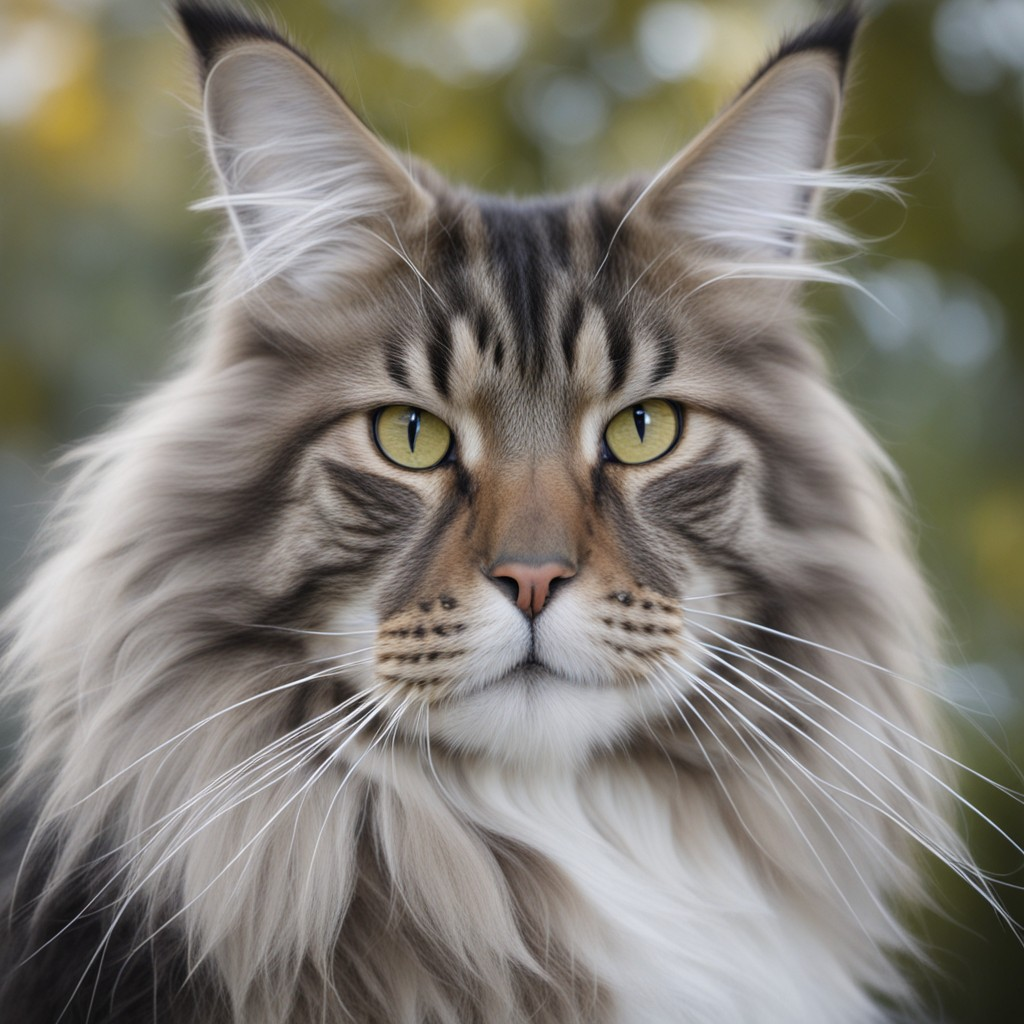

In [3]:
gen_image_diffusion("A very handsome Maine Coon, sharp focus, 4k")